# **ML-based prediction of VEGF receptor 2 inhibitory activity for compounds**

 **Load Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset for VEGFR2.csv to Dataset for VEGFR2.csv


In [ ]:
# Load your dataset
import pandas as pd
df = pd.read_csv("Dataset for VEGFR2.csv")

**Convert IC50 values into binary** **class**

In [ ]:
# Convert IC50 values into binary class
threshold = 1000 # the unit of IC50 values is in NM
df['Label'] = df['IC50'].apply(lambda x: 1 if x <= threshold else 0)

**Convert SMILES into molecular fingerprints**

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 40.6 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
# Convert SMILES into fingerprints
def smiles_to_morgan_fp(smiles, radius=2, nbits=2048):
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None:
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nbits)
  else:
    return None

# Ensure that the SMILES are in string type
df['Smiles'] = df['Smiles'].astype(str)
df = df[df['Smiles'].apply(lambda x: x != 'nan')]
fingerprints = df['Smiles'].apply(smiles_to_morgan_fp)

df = df[fingerprints.notnull()]
fingerprints = fingerprints[fingerprints.notnull()]

X = np.array([np.array(fp) for fp in fingerprints])

print("Fingerprint shape:", X.shape)

[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerator
[13:14:48] DEPRECATION WARNING: please use MorganGenerat

Fingerprint shape: (1005, 2048)


**Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Define y
y = df['Label']
# Split the data 80% for testing and 20% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} compounds")
print(f"Testing set size: {X_test.shape[0]} compounds")

Training set size: 804 compounds
Testing set size: 201 compounds


**Train the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluate the model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8159203980099502
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.83      0.79      0.81        99

    accuracy                           0.82       201
   macro avg       0.82      0.82      0.82       201
weighted avg       0.82      0.82      0.82       201



**Visualise the results**

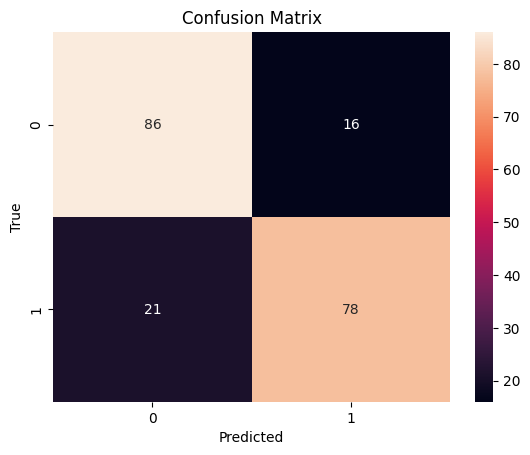

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()